In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections

In [38]:
N = 1000
k = 4

### Simulation of Erdos-Renyl Graph Model

In [39]:
p = k/(N-1)

In [40]:
G = nx.erdos_renyi_graph(N, p)
print(f"Simulation Parameters: N = {N}, p = {p:.5f}")

Simulation Parameters: N = 1000, p = 0.00400


In [41]:
degrees_er = [d for n,d in G.degree()]
avg_k_er = sum(degrees_er) /N
avg_c_er = nx.average_clustering(G)

print(f"Final Average Degree (<k>): {avg_k_er:.4f}")
print(f"Average Clustering Coefficient (C): {avg_c_er:.4f}")

Final Average Degree (<k>): 4.0600
Average Clustering Coefficient (C): 0.0029


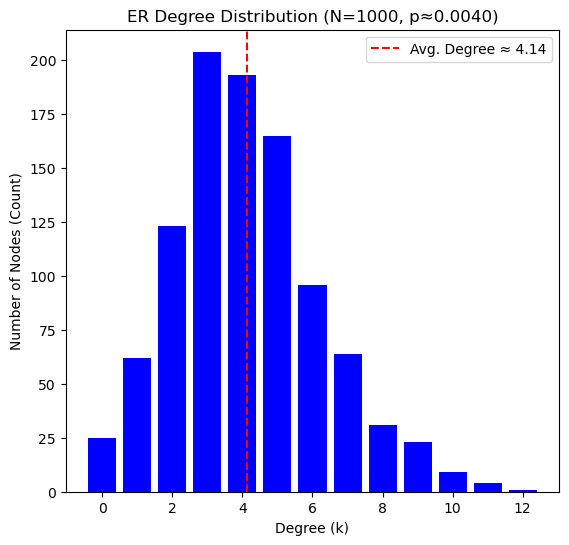

In [12]:
degree_counts_er = collections.Counter(sorted(degrees_er))
deg_er, cnt_er = zip(*degree_counts_er.items())

plt.figure(figsize=(14, 6))

# ER Plot
plt.subplot(1, 2, 1)
plt.bar(deg_er, cnt_er, width=0.80, color="b")
plt.title(f"ER Degree Distribution (N={N}, p≈{p:.4f})")
plt.xlabel("Degree (k)")
plt.ylabel("Number of Nodes (Count)")
plt.axvline(avg_k_er, color='red', linestyle='--', label=f'Avg. Degree ≈ {avg_k_er:.2f}')
plt.legend()

### Barabasi-Albert (BA) Model

In [13]:
m = 2

In [14]:
BA_G = nx.barabasi_albert_graph(N, m)
print(f"Simulation Parameters: N={N}, m={m}")

Simulation Parameters: N=1000, m=2


In [16]:
degrees_ba = [d for n, d in BA_G.degree()]
avg_k_ba = sum(degrees_ba) / N
avg_c_ba = nx.average_clustering(BA_G)

print(f"Final Average Degree (<k>): {avg_k_ba:.4f}")
print(f"Average Clustering Coefficient (C): {avg_c_ba:.4f}")

Final Average Degree (<k>): 3.9920
Average Clustering Coefficient (C): 0.0244


In [17]:
degree_counts_ba = collections.Counter(sorted(degrees_ba))
deg_ba, cnt_ba = zip(*degree_counts_ba.items())

pk_ba = [c / N for c in cnt_ba]

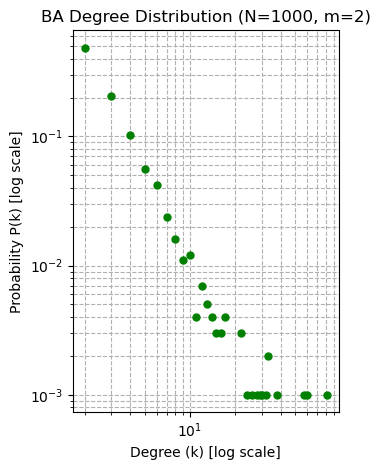

In [18]:
plt.subplot(1, 2, 2)
plt.loglog(deg_ba, pk_ba, 'go', markersize=5)
plt.title(f"BA Degree Distribution (N={N}, m={m})")
plt.xlabel("Degree (k) [log scale]")
plt.ylabel("Probability P(k) [log scale]")
plt.grid(True, which="both", ls="--")

# Display plots
plt.tight_layout()
plt.show()

In [19]:
import urllib.request
import io
import zipfile

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]

In [20]:
G = nx.parse_gml(gml)

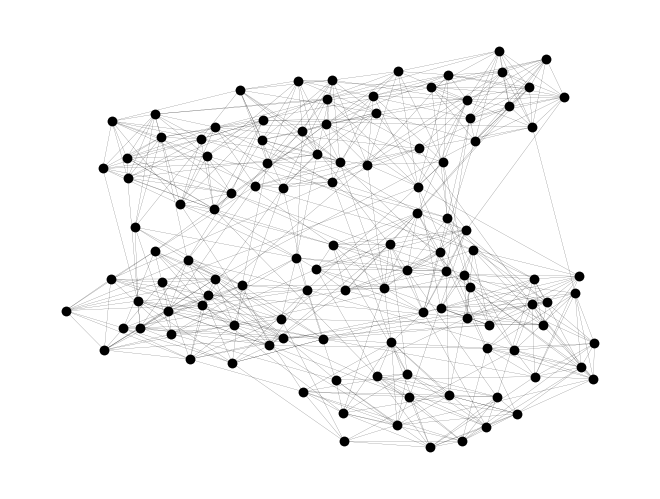

In [23]:
options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

In [25]:
N_real = G.number_of_nodes()
M_real = G.number_of_edges()

degrees_real = [d for n, d in G.degree()]
avg_k_real = sum(degrees_real) / N_real

# Calculate average clustering coefficient
avg_c_real = nx.average_clustering(G)

print(f"Network: College Football")
print(f"Nodes (N): {N_real}")
print(f"Edges (M): {M_real}")
print(f"Final Average Degree (<k>): {avg_k_real:.4f}")
print(f"Average Clustering Coefficient (C): {avg_c_real:.4f}")

Network: College Football
Nodes (N): 115
Edges (M): 613
Final Average Degree (<k>): 10.6609
Average Clustering Coefficient (C): 0.4032


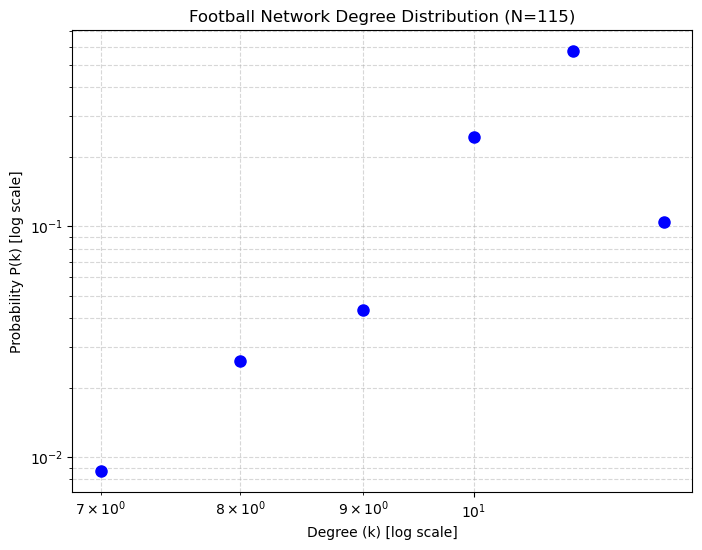

In [26]:
degree_counts_real = collections.Counter(sorted(degrees_real))
deg_real, cnt_real = zip(*degree_counts_real.items())

pk_real = [c / N_real for c in cnt_real]

plt.figure(figsize=(8, 6))
plt.loglog(deg_real, pk_real, 'bo', markersize=8)
plt.title(f"Football Network Degree Distribution (N={N_real})")
plt.xlabel("Degree (k) [log scale]")
plt.ylabel("Probability P(k) [log scale]")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()